In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [4]:
# Define paths
train_dir = '/content/drive/MyDrive/Train'
valid_dir = '/content/drive/MyDrive/Validation'
test_dir = '/content/drive/MyDrive/Test'


In [5]:
# Data processing and augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(299, 299),  # Xception input size
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(valid_dir,
                                                              target_size=(299, 299),
                                                              batch_size=32,
                                                              class_mode='binary')



Found 1322 images belonging to 1 classes.
Found 60 images belonging to 1 classes.


In [6]:
# Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


83683744/83683744 [==============================] - 5s 0us/step


In [7]:

# Create a custom model on top of Xception
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))



In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [9]:
# Model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21123881 (80.58 MB)
Trainable params: 21069353 (80.37 MB)
Non-trainable params: 54528 (213.00 KB)
__________

In [10]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)



Epoch 1/10
41/41 [==============================] - 1305s 31s/step - loss: 0.0289 - accuracy: 0.9775 - val_loss: 3.3521e-09 - val_accuracy: 1.0000
Epoch 2/10
41/41 [==============================] - 124s 3s/step - loss: 3.3818e-06 - accuracy: 1.0000 - val_loss: 4.5416e-10 - val_accuracy: 1.0000
Epoch 3/10
41/41 [==============================] - 122s 3s/step - loss: 2.0861e-06 - accuracy: 1.0000 - val_loss: 7.7776e-10 - val_accuracy: 1.0000
Epoch 4/10
41/41 [==============================] - 136s 3s/step - loss: 3.7291e-06 - accuracy: 1.0000 - val_loss: 1.4544e-09 - val_accuracy: 1.0000
Epoch 5/10
41/41 [==============================] - 141s 3s/step - loss: 6.8283e-07 - accuracy: 1.0000 - val_loss: 1.5846e-09 - val_accuracy: 1.0000
Epoch 6/10
41/41 [==============================] - 126s 3s/step - loss: 3.6388e-07 - accuracy: 1.0000 - val_loss: 1.6382e-09 - val_accuracy: 1.0000
Epoch 7/10
41/41 [==============================] - 124s 3s/step - loss: 2.1383e-07 - accuracy: 1.0000 - val

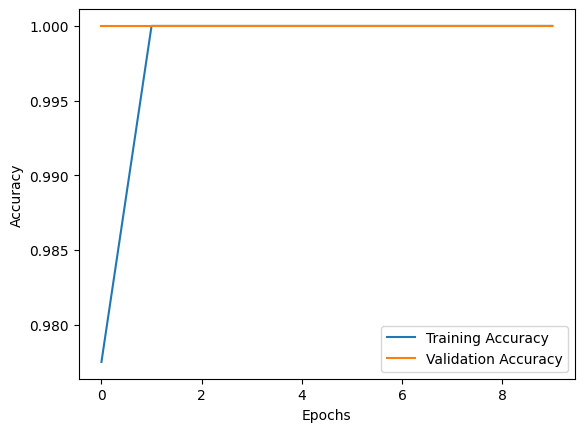

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [12]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(299, 299),
                                                  batch_size=32,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


Found 150 images belonging to 1 classes.
4/4 [==============================] - 98s 32s/step - loss: 5.6997e-09 - accuracy: 1.0000
Test Accuracy: 100.00%
